In [2]:
from datetime import datetime, time
import pandas as pd

In [9]:
file_path = "/Users/siddh/Downloads/myExpenses1.csv"

df = pd.read_csv(file_path, usecols=[0,1,2])

df.head()

,date,expense,category
0,1/3/23 7:00,7,Miscellaneous
1,1/3/23 10:00,20,Travel
2,1/3/23 13:00,15,Travel
3,1/3/23 14:00,12,Food
4,1/3/23 15:00,12,Travel


In [10]:
import matplotlib.pyplot as plt 

In [45]:

df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

df_grouped = df.groupby('year_month')['expense'].sum().reset_index()
df_grouped['year_month'] = df_grouped['year_month'].astype(str)


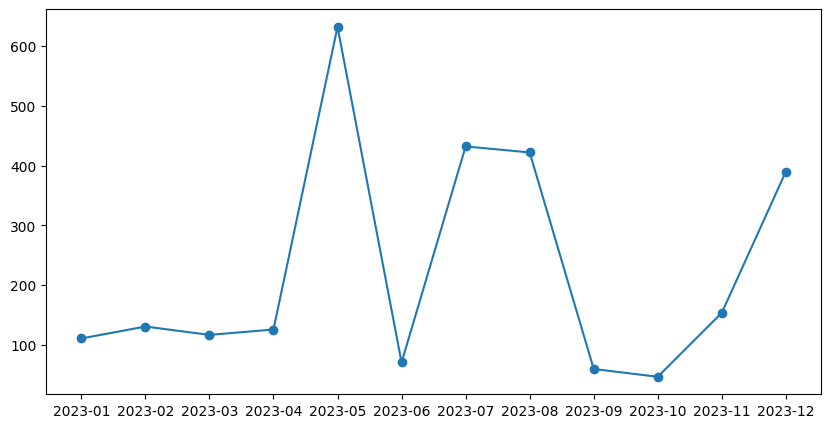

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['year_month'], df_grouped['expense'], marker='o')

In [32]:
from prophet import Prophet

In [49]:
model = Prophet()
df_grouped = df.groupby('year_month')['expense'].sum().reset_index()
df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()
df_grouped.columns = ['ds', 'y']
model.fit(df_grouped)

20:09:52 - cmdstanpy - INFO - Chain [1] start processing
20:09:53 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail(3)

/opt/homebrew/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat
12,2023-12-31,271.225888
13,2024-01-31,278.642692
14,2024-02-29,285.580992
